In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

In [ ]:
!pip install arabic_reshaper python-bidi

**Data Connection**

In [2]:
outlets = pd.read_csv('/content/drive/MyDrive/Data/Data Analysis Project - Practice/Outlets.csv',encoding="UTF8")
products = pd.read_csv('/content/drive/MyDrive/Data/Data Analysis Project - Practice/Products.csv',encoding="UTF8")
reps = pd.read_excel('/content/drive/MyDrive/Data/Data Analysis Project - Practice/Reps List.xlsx')
sales = pd.read_excel('/content/drive/MyDrive/Data/Data Analysis Project - Practice/Sales.xlsx')
targets = pd.read_excel('/content/drive/MyDrive/Data/Data Analysis Project - Practice/Targets April 2021.xlsx',sheet_name='Targets')
visits = pd.read_excel('/content/drive/MyDrive/Data/Data Analysis Project - Practice/Visits.xlsx')
warehouses = pd.read_excel('/content/drive/MyDrive/Data/Data Analysis Project - Practice/Warehouses.xlsx')

In [3]:
target_df = pd.merge(targets, reps, on = ['ID','Name','Username','ZONE','Distributor'], how = 'outer')
target_df = target_df.drop(['Unnamed: 7','Unnamed: 8'],axis=1)
target_df

,ID,Username,Name,ZONE,Distributor,Target,AC,Role
0,1,Rep0003,Mohamed Hussein,Delta,DB 1,195000,130,SalesMan
1,2,Rep0004,Thabet Ali,Delta,DB 2,460000,120,SalesMan
2,3,Rep0005,Amgad Mohsen,Upper,DB 3,175000,110,SalesMan
3,4,Rep0006,Baher,Delta,DB 4,490000,190,SalesMan
4,5,Rep0007,Omar,Cairo/Giza,DB 5,350000,60,SalesMan
5,6,Rep0008,Yasser,Delta,DB 6,400000,200,SalesMan
6,7,Rep0009,Osama,Upper,DB 7,320000,175,SalesMan
7,8,Rep0010,Amgad,Delta,DB 4,330000,175,SalesMan
8,9,Rep0011,محمد احمد,Upper,DB 7,400000,175,SalesMan
9,10,Rep0012,أمير,Upper,DB 3,420000,175,SalesMan


#What is the highest Distributor's Target?

In [4]:
pvt_1 = pd.pivot_table(
    data = target_df,
    index = 'Distributor',
    values = 'Target',
    aggfunc = 'max'
)
pvt_1

,Target
Distributor,
DB 1,195000
DB 2,460000
DB 3,420000
DB 4,490000
DB 5,350000
DB 6,400000
DB 7,400000


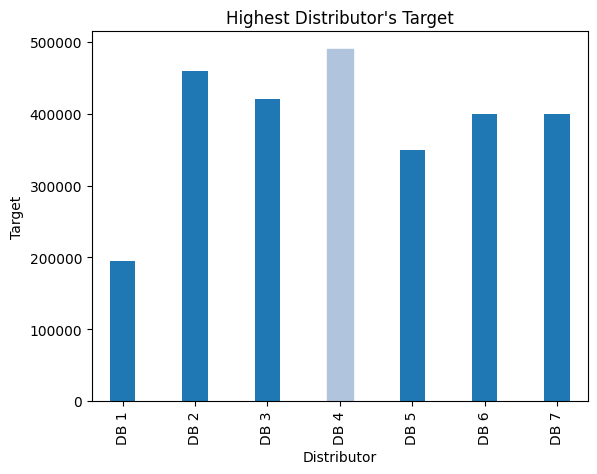

In [49]:
max_index = pvt_1['Target'].idxmax()
bars = pvt_1.plot(kind='bar', width=0.35, legend=False)
bars.patches[pvt_1.index.get_loc(max_index)].set_color('lightsteelblue')

plt.xlabel("Distributor")
plt.ylabel("Target")
plt.title("Highest Distributor's Target")

plt.show()

# Which zone has the highest target?


In [6]:
pvt_2 = pd.pivot_table(
    data = target_df,
    index = 'ZONE',
    values = 'Target',
    aggfunc = 'sum'
)
pvt_2

,Target
ZONE,
Cairo/Giza,350000
Delta,2025000
Upper,1445000


<Axes: xlabel='ZONE', ylabel='Target'>

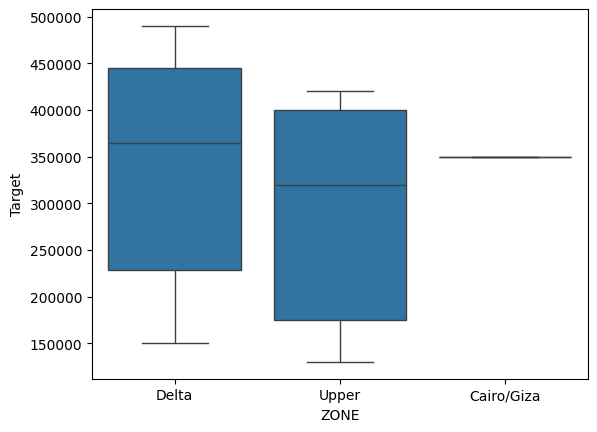

In [7]:
sns.boxplot(data = target_df, x = 'ZONE', y = 'Target')

# Who is the most Active Distributor?

In [8]:
pvt_3 = pd.pivot_table(
    data = target_df,
    index = 'Distributor',
    values = 'AC',
    aggfunc = 'max'
)
pvt_3

,AC
Distributor,
DB 1,130
DB 2,120
DB 3,175
DB 4,190
DB 5,60
DB 6,200
DB 7,175


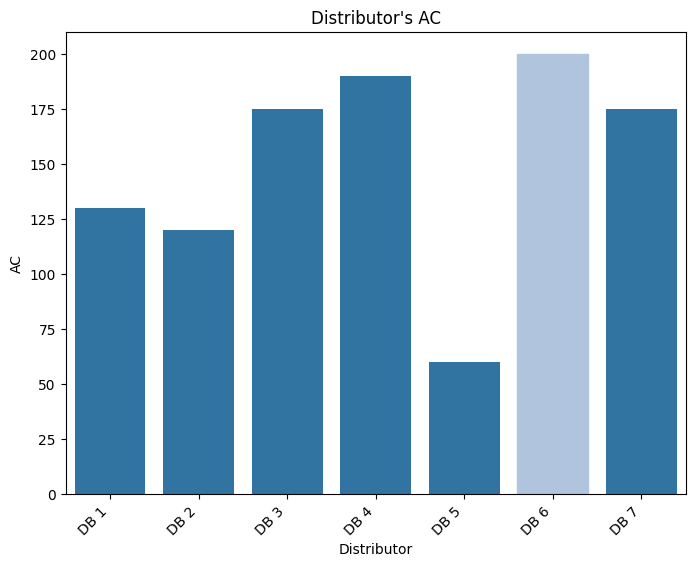

In [50]:
plt.figure(figsize=(8, 6))

bars = sns.barplot(x=pvt_3.index, y=pvt_3['AC'])
highest_index = pvt_3['AC'].idxmax()
bars.patches[pvt_3.index.get_loc(highest_index)].set_color('lightsteelblue')

plt.title("Distributor's AC")
plt.xlabel("Distributor")
plt.ylabel("AC")
plt.xticks(rotation=45, ha='right')

plt.show()

Merge "outlets" and "warehourses" datasets

In [10]:
outlet_df = pd.merge(outlets, warehouses, on = 'Warehouse Name', how = 'left')
outlet_df

,OutletId,Outlet Name,Outlet Class,Outlet Type,Employee_Code,Employee_Name,Warehouse Code,Warehouse Name,Code,Region
0,1,ابو السعود,تجزئه- بقالة,تجزئه,3,Amgad Mohsen,12422,DB 3,12422,Upper
1,2,ابو العز,تجزئه- بقالة,تجزئه,9,محمد احمد,39145,DB 7,39145,Upper
2,3,ابو حسن السورى,تجزئه- بقالة,تجزئه,11,Rep 13,14856,DB 1,14856,Delta
3,4,ابو خالد,تجزئه- بقالة,تجزئه,1,Mohamed Hussein,14856,DB 1,14856,Delta
4,5,ابو وائل ماركت,تجزئه- بقالة,تجزئه,3,Amgad Mohsen,12422,DB 3,12422,Upper
...,...,...,...,...,...,...,...,...,...,...
5161,5162,محمد,تجزئه- بقالة,تجزئه,3,Amgad Mohsen,12422,DB 3,12422,Upper
5162,5163,منظفات طيبه,تجزئه- منظفات,تجزئه,12,Rep 14,12422,DB 3,12422,Upper
5163,5164,هايبر الجمله,تجزئه- بقالة,تجزئه,11,Rep 13,14856,DB 1,14856,Delta
5164,5165,الشهاب,تجزئه- بقالة,تجزئه,8,Amgad,99510,DB 4,99510,Delta


In [11]:
outlet_df.duplicated().sum()

0

In [12]:
outlet_df.isna().sum()

,0
OutletId,0
Outlet Name,0
Outlet Class,0
Outlet Type,0
Employee_Code,0
Employee_Name,0
Warehouse Code,0
Warehouse Name,0
Code,0
Region,0


In [13]:
outlet_df['Outlet Class'].unique()

array(['تجزئه- بقالة', 'جمله غذائى', 'تجزئه- منظفات', 'جمله منظفات'],
      dtype=object)

In [14]:
outlet_df['Outlet Type'].unique()

array(['تجزئه', 'جمله', 'تجزئة'], dtype=object)

In [15]:
outlet_df['Outlet Type'] = outlet_df['Outlet Type'].replace({'تجزئة': 'تجزئه'})

In [16]:
outlet_df.dtypes

,0
OutletId,int64
Outlet Name,object
Outlet Class,object
Outlet Type,object
Employee_Code,int64
Employee_Name,object
Warehouse Code,int64
Warehouse Name,object
Code,int64
Region,object


# What is the Distribution of each Outlet Type?

In [17]:
pvt_4 = pd.pivot_table(
    data = outlet_df,
    index = 'Outlet Type',
    values = 'Region',
    aggfunc = 'count'
)
pvt_4

,Region
Outlet Type,
تجزئه,4602
جمله,564


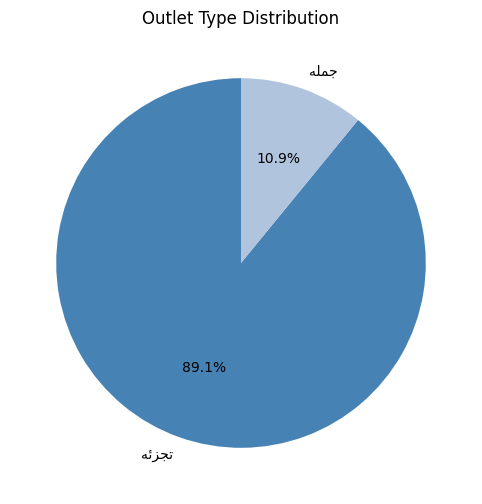

In [53]:
labels = [get_display(arabic_reshaper.reshape(label)) for label in pvt_4.index]
colors = ['steelblue','lightsteelblue']

plt.figure(figsize=(8, 6))
plt.pie(pvt_4['Region'], labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Outlet Type Distribution')
plt.show()

Calculates and stores the total purchase price for each user in the sales data.

In [19]:
user_total_price = sales.groupby('Name_Of_The_User')['Total Price'].sum()

print(user_total_price)

Name_Of_The_User
Amgad              29139597.08
Amgad Mohsen       16444864.40
Baher              27235954.16
Mohamed Hussein    26279832.67
Omar               15400255.42
Osama              24906027.21
Rep 13             24767224.85
Rep 14             18274549.64
Thabet Ali         21604657.08
Yasser             16517568.45
أمير               21750556.47
محمد احمد          14040779.80
Name: Total Price, dtype: float64


Merge "sales" and "visits" datasets

In [20]:
sales = sales.rename(columns={'Sub_Db_Name':'DB Name'})
sales_df = pd.merge(sales, visits, on = ['DB Name','Date'], how = 'left')
sales_df

,Date,DB Name,Username,Name_Of_The_User,Outlet_Id,PRODUCT_CODE,Product Name,Quantity,Price_Per_Piece,Total Price,Sales Rep ID,Sales Rep Name,Classification,Store Code,Visit Starting Time,Visit Ending Time,Sale Amount
0,2020-01-01,DB 4,Rep0010,Amgad,81,96938,Detergent 120ml,48,19.84,952.32,8.0,Amgad,جمله,5104.0,17:15:33,17:15:39,NaN
1,2020-01-01,DB 4,Rep0010,Amgad,81,96938,Detergent 120ml,48,19.84,952.32,4.0,Baher,جمله,1958.0,17:16:38,17:16:44,NaN
2,2020-01-01,DB 4,Rep0010,Amgad,81,96938,Detergent 120ml,48,19.84,952.32,8.0,Amgad,جمله,1721.0,17:16:51,17:16:57,NaN
3,2020-01-01,DB 4,Rep0010,Amgad,81,52554,Soap 125gm - Normal,7,8.33,58.31,8.0,Amgad,جمله,5104.0,17:15:33,17:15:39,NaN
4,2020-01-01,DB 4,Rep0010,Amgad,81,52554,Soap 125gm - Normal,7,8.33,58.31,4.0,Baher,جمله,1958.0,17:16:38,17:16:44,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22022735,2020-09-30,DB 1,Rep0013,Rep 13,4964,73955,SG 300ml Normal 2 Pcs with 50% discount,-59,61.25,-3613.75,11.0,Rep 13,تجزئه,3885.0,20:26:15,20:27:13,NaN
22022736,2020-09-30,DB 1,Rep0013,Rep 13,4964,73955,SG 300ml Normal 2 Pcs with 50% discount,-59,61.25,-3613.75,1.0,Mohamed Hussein,تجزئه,235.0,20:32:34,20:33:28,NaN
22022737,2020-09-30,DB 1,Rep0013,Rep 13,4964,73955,SG 300ml Normal 2 Pcs with 50% discount,-59,61.25,-3613.75,1.0,Mohamed Hussein,تجزئه,1038.0,20:53:11,20:54:14,NaN
22022738,2020-09-30,DB 1,Rep0013,Rep 13,4964,73955,SG 300ml Normal 2 Pcs with 50% discount,-59,61.25,-3613.75,1.0,Mohamed Hussein,تجزئه,724.0,20:58:48,20:59:27,NaN


In [21]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22022740 entries, 0 to 22022739
Data columns (total 17 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Date                 datetime64[ns]
 1   DB Name              object        
 2   Username             object        
 3   Name_Of_The_User     object        
 4   Outlet_Id            int64         
 5   PRODUCT_CODE         int64         
 6   Product Name         object        
 7   Quantity             int64         
 8   Price_Per_Piece      float64       
 9   Total Price          float64       
 10  Sales Rep ID         float64       
 11  Sales Rep Name       object        
 12  Classification       object        
 13  Store Code           float64       
 14  Visit Starting Time  object        
 15  Visit Ending Time    object        
 16  Sale Amount          float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(8)
memory usage: 2.8+ GB


In [22]:
sales_df = sales_df.drop(['Sale Amount'], axis=1)

In [23]:
sales_df.duplicated().sum()

113376

In [24]:
sales_df.isna().sum()

,0
Date,0
DB Name,0
Username,0
Name_Of_The_User,0
Outlet_Id,0
PRODUCT_CODE,0
Product Name,0
Quantity,0
Price_Per_Piece,0
Total Price,0


In [25]:
sales_df.drop_duplicates(inplace=True)
sales_df.dropna(inplace=True)

# Which Sales Rep has generated the highest total revenue?

In [26]:
pvt_5 = pd.pivot_table(
    data = sales_df,
    index = 'Sales Rep Name',
    values = 'Total Price',
    aggfunc = 'sum'
)
pvt_5

,Total Price
Sales Rep Name,
Amgad,2.618656e+09
Amgad Mohsen,2.625477e+09
Baher,2.595895e+09
Mohamed Hussein,2.333748e+09
Omar,7.137918e+08
Osama,1.885881e+09
Rep 13,2.263166e+09
Rep 14,2.647851e+09
Thabet Ali,1.011781e+09


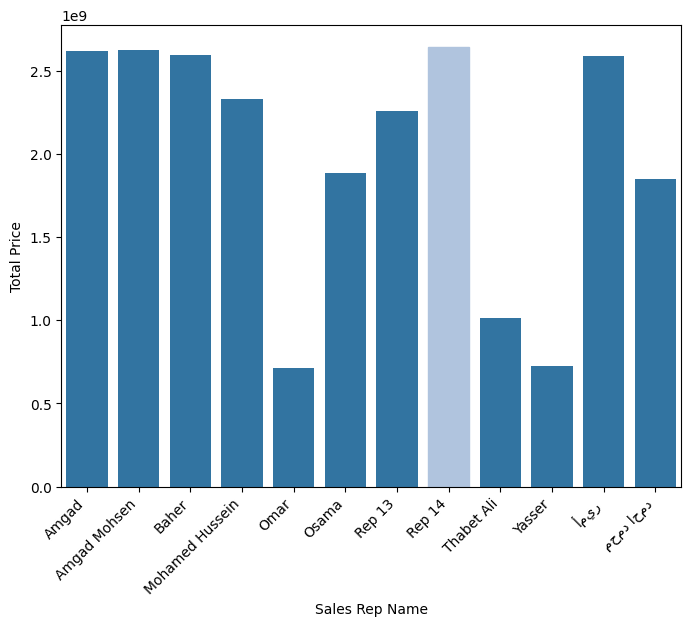

In [54]:
plt.figure(figsize=(8, 6))

bars = sns.barplot(x=pvt_5.index, y=pvt_5['Total Price'])
plt.xlabel("Sales Rep Name")
plt.ylabel("Total Price")
plt.xticks(rotation=45, ha='right')

highest_index = pvt_5['Total Price'].idxmax()
bars.patches[pvt_5.index.get_loc(highest_index)].set_color('lightsteelblue')

plt.show()

# What are the top-selling products by revenue

In [28]:
pvt_7 = pd.pivot_table(
    data = sales_df,
    index = 'Product Name',
    values = 'Total Price',
    aggfunc = 'max'
)
pvt_7

,Total Price
Product Name,
Detergent 120ml,76185.60
Detergent 1L,15311.16
Detergent 1L discounted 10%,998071.20
Detergent 235ml,55670.40
Detergent 245ml,32482.80
Detergent 500ml,178464.00
Detergent 500ml 2 pcs with 50% discount,7137.60
Detergent 500ml discounted 10%,344376.00
Detergent 50ml,196672.32


In [29]:
df2 = pd.pivot_table(sales_df, index = 'Product Name', values = 'Total Price', aggfunc = 'max').reset_index()

px.bar(df2, x = 'Product Name', y = 'Total Price', color = 'Product Name', text = 'Total Price', text_auto = ',.2s').update_traces(textposition = 'outside').update_layout(xaxis_tickangle = -45)

# What is the sales trend over time?

In [30]:
sales_trend = sales_df.groupby('Date')['Total Price'].sum().reset_index()

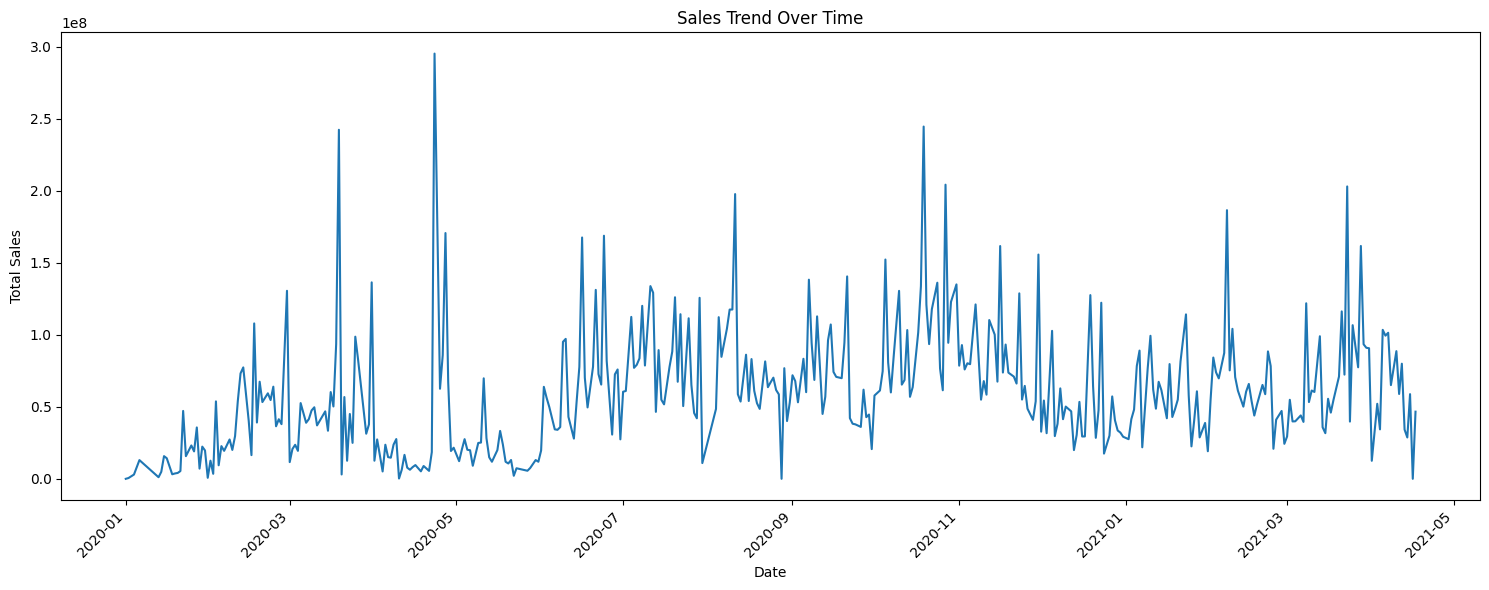

In [31]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Total Price', data=sales_trend)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
products

,Product ID,Product Code,Product Name,Category,subcategory,Price,Unnamed: 6,Unnamed: 7,29034,96938
0,1.0,96938.0,Detergent 120ml,Detergent,Detergent 120ml,19.84,NaN,NaN,33590,52554
1,2.0,52554.0,Soap 125gm - Normal,Soap,BS 125,8.33,NaN,NaN,33591,22134
2,3.0,22134.0,Soap 125gm - Red,Soap,BS 125,8.33,NaN,NaN,33592,75443
3,4.0,75443.0,Soap 125gm - blue,Soap,BS 125,8.33,NaN,NaN,33593,99185
4,5.0,99185.0,Soap 125gm - yellow,Soap,BS 125,8.33,NaN,NaN,33599,39671
...,...,...,...,...,...,...,...,...,...,...
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34010,29944
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30036,74527
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2207,41850
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34007,82910


In [33]:
products = products.drop(['Unnamed: 6','Unnamed: 7','29034','96938'], axis=1)
products

,Product ID,Product Code,Product Name,Category,subcategory,Price
0,1.0,96938.0,Detergent 120ml,Detergent,Detergent 120ml,19.84
1,2.0,52554.0,Soap 125gm - Normal,Soap,BS 125,8.33
2,3.0,22134.0,Soap 125gm - Red,Soap,BS 125,8.33
3,4.0,75443.0,Soap 125gm - blue,Soap,BS 125,8.33
4,5.0,99185.0,Soap 125gm - yellow,Soap,BS 125,8.33
...,...,...,...,...,...,...
118,NaN,NaN,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
products.duplicated().sum()

72

In [35]:
products.drop_duplicates(inplace=True)
products

,Product ID,Product Code,Product Name,Category,subcategory,Price
0,1.0,96938.0,Detergent 120ml,Detergent,Detergent 120ml,19.84
1,2.0,52554.0,Soap 125gm - Normal,Soap,BS 125,8.33
2,3.0,22134.0,Soap 125gm - Red,Soap,BS 125,8.33
3,4.0,75443.0,Soap 125gm - blue,Soap,BS 125,8.33
4,5.0,99185.0,Soap 125gm - yellow,Soap,BS 125,8.33
5,6.0,39671.0,Soap 165gm - Normal,Soap,BS 165,10.83
6,7.0,98761.0,Soap 165gm - Red,Soap,BS 165,10.83
7,8.0,78236.0,Soap 165gm - blue,Soap,BS 165,10.83
8,9.0,27977.0,Soap 165gm - yellow,Soap,BS 165,10.83
9,10.0,77397.0,Soap 60gm - Normal,Soap,BS 60,3.50


In [36]:
products.isna().sum()

,0
Product ID,1
Product Code,1
Product Name,1
Category,1
subcategory,1
Price,1


In [37]:
products.dropna(inplace=True)
products

,Product ID,Product Code,Product Name,Category,subcategory,Price
0,1.0,96938.0,Detergent 120ml,Detergent,Detergent 120ml,19.84
1,2.0,52554.0,Soap 125gm - Normal,Soap,BS 125,8.33
2,3.0,22134.0,Soap 125gm - Red,Soap,BS 125,8.33
3,4.0,75443.0,Soap 125gm - blue,Soap,BS 125,8.33
4,5.0,99185.0,Soap 125gm - yellow,Soap,BS 125,8.33
5,6.0,39671.0,Soap 165gm - Normal,Soap,BS 165,10.83
6,7.0,98761.0,Soap 165gm - Red,Soap,BS 165,10.83
7,8.0,78236.0,Soap 165gm - blue,Soap,BS 165,10.83
8,9.0,27977.0,Soap 165gm - yellow,Soap,BS 165,10.83
9,10.0,77397.0,Soap 60gm - Normal,Soap,BS 60,3.50


# Which product category has the highest sales revenue?

In [38]:
pvt_8 = pd.pivot_table(
    data = products,
    index = 'Category',
    values = 'Price',
    aggfunc = 'max'
)
pvt_8

,Price
Category,
Detergent,198.03
Shower gel,61.25
Soap,41.33


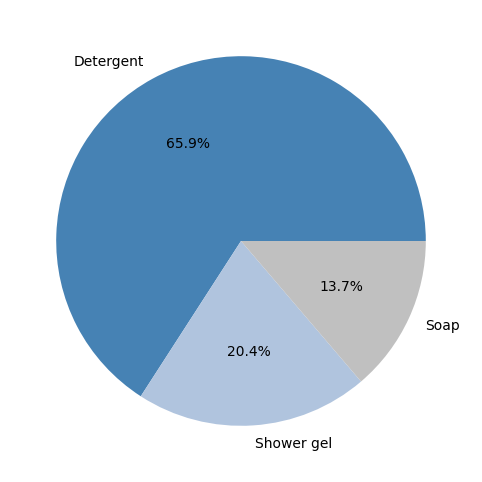

In [58]:
colors = ['steelblue','lightsteelblue','silver']

plt.figure(figsize=(8, 6))
plt.pie(pvt_8['Price'], labels=pvt_8.index, autopct='%1.1f%%', colors=colors)
plt.show()